In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import f1_score,confusion_matrix,roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [3]:
df = pd.read_csv('heart.csv')

In [6]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
selector = VarianceThreshold(threshold=0.7)

# Fit the selector to the data
selector.fit(df)

# Get the boolean mask of the selected features
mask = selector.get_support()

# Get the selected feature names
selected_features = df.columns[mask]

# Create a new dataframe with only the selected features
new_data = df[selected_features]

In [9]:
new_data

,age,cp,trtbps,chol,thalachh,oldpeak,caa
0,63,3,145,233,150,2.3,0
1,37,2,130,250,187,3.5,0
2,41,1,130,204,172,1.4,0
3,56,1,120,236,178,0.8,0
4,57,0,120,354,163,0.6,0
...,...,...,...,...,...,...,...
298,57,0,140,241,123,0.2,0
299,45,3,110,264,132,1.2,0
300,68,0,144,193,141,3.4,2
301,57,0,130,131,115,1.2,1


In [7]:
sel_variance_threshold = VarianceThreshold() 
X_train_remove_variance = sel_variance_threshold.fit_transform(df)
print(X_train_remove_variance.shape)

(303, 14)


In [11]:
corr_matrix=df.corr()
print(corr_matrix)

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

<Axes: >

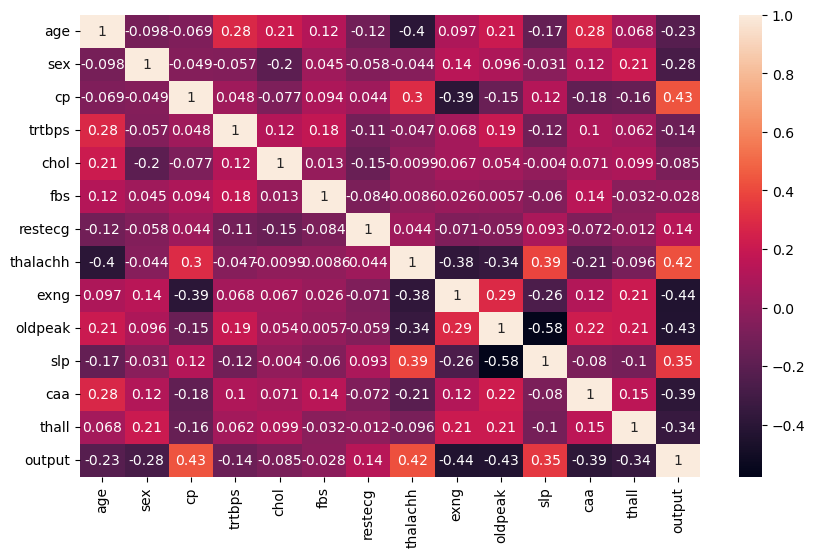

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
X=df.drop('output',axis=1)
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y=df['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [ ]:
scaler=StandardScaler()
scaler.fit()

In [10]:
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()

# Create the forward feature selector
selector = SequentialFeatureSelector(estimator, forward=True, k_features=3, scoring='r2', cv=5)

# Fit the selector to the dataset
selector.fit(X, y)
# Print the selected feature indices
print(selector.k_feature_idx_)
print(selector.k_feature_names_)

(8, 9, 12)
('exng', 'oldpeak', 'thall')


In [16]:
bfs = LinearRegression()
# Create the forward feature selector
selector = SequentialFeatureSelector(bfs, forward=False, k_features=4, scoring='r2', cv=5)
# Fit the selector to the dataset
selector.fit(X, y)
# Print the selected feature indices
print(selector.k_feature_idx_)
print(selector.k_feature_names_)

(6, 8, 9, 12)
('restecg', 'exng', 'oldpeak', 'thall')


In [22]:
from sklearn.feature_selection import RFE
# Create a linear regression estimator
estimator = LinearRegression()

# Create the backward feature eliminator
selector = RFE(estimator, n_features_to_select=4, step=5, verbose=10)
# Fit the selector to the dataset
selector.fit(X, y)
rfe_support = selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
rfe_feature

Fitting estimator with 13 features.
Fitting estimator with 8 features.


['sex', 'cp', 'exng', 'thall']

In [27]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [26]:
estimator = LassoCV(cv=5)

sfm = SelectFromModel(estimator, prefit=False, norm_order=1, max_features=None)

sfm.fit(X, y)

feature_idx = sfm.get_support()
Lasso_features = X.columns[feature_idx].tolist()
Lasso_features

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall']

['cp', 'caa', 'thall', 'oldpeak', 'chol', 'age', 'thalachh']

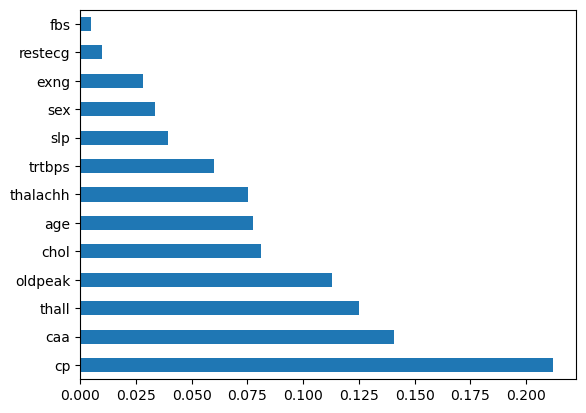

In [29]:
import random
np.random.seed(10)
model = RandomForestRegressor(random_state = random.seed(10))
model.fit(X, y)
features = X
importances = model.feature_importances_
indices = np.argsort(importances)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
rf_top_features = pd.DataFrame(feat_importances.nlargest(7)).axes[0].tolist()
rf_top_features

In [30]:
#2.Select the top n features based on absolute correlation with target variable
corr_data1 = pd.concat([y,X],axis = 1)
corr_data = corr_data1.corr()
corr_data = corr_data.iloc[: , [0]]
corr_data.columns.values[0] = "Correlation"
corr_data = corr_data.iloc[corr_data.Correlation.abs().argsort()] 
corr_data = corr_data[corr_data['Correlation'].notna()]
corr_data = corr_data.loc[corr_data['Correlation'] != 1]
corr_data2 = corr_data.loc[corr_data['Correlation'].abs() > .4]
corr_top_features = corr_data2.axes[0].tolist()
corr_top_features
corr_data

,Correlation
fbs,-0.028046
chol,-0.085239
restecg,0.137230
trtbps,-0.144931
age,-0.225439
sex,-0.280937
thall,-0.344029
slp,0.345877
caa,-0.391724
thalachh,0.421741


In [31]:
# Combining features from all the models

combined_feature_list = rfe_feature + Lasso_features + corr_top_features + rf_top_features

combined_feature = {x:combined_feature_list.count(x) for x in combined_feature_list}
combined_feature_data = pd.DataFrame.from_dict(combined_feature,orient='index')
combined_feature_data.rename(columns={ combined_feature_data.columns[0]: "number_of_models" }, inplace = True)
combined_feature_data = combined_feature_data.sort_values(['number_of_models'], ascending=[False])
combined_feature_data.head(100)

,number_of_models
cp,4
exng,3
thall,3
thalachh,3
oldpeak,3
sex,2
age,2
chol,2
caa,2
trtbps,1


['cp', 'caa', 'thalachh', 'oldpeak', 'thall', 'age', 'chol']

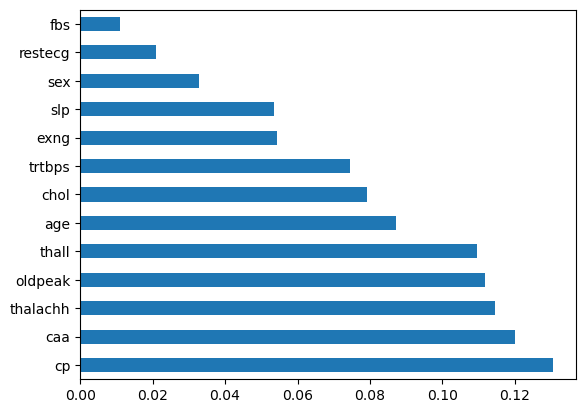

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=340)
model.fit(X, y)
features = X
importances = model.feature_importances_
indices = np.argsort(importances)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
rf_top_features = pd.DataFrame(feat_importances.nlargest(7)).axes[0].tolist()
rf_top_features